# Code for Section 1.2 Market states, structural breaks, and time-conditioning

In [1]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

# Transition matrix analysis

In [2]:
# Specify doubly stochastic transition matrix
transition_matrix = np.array([[0.90, 0.10, 0.00],
                              [0.10, 0.80, 0.10],
                              [0.00, 0.10, 0.90]])

In [3]:
# Verify uniform stationary solution
pi = np.array([1/3, 1/3, 1/3])
print(pi @ transition_matrix)

[0.33333333 0.33333333 0.33333333]


In [4]:
# Specify head probability states and states vectors
S = np.array([0.10, 0.50, 0.90])

In [5]:
# Specify a function for simulating the coin flip Markov chain
def simulate_coin_markov_chain(
    transition_matrix, coin_probabilities, initial_state, T):
    """Function for simulating the coin flip Markov chain."""
    states = np.arange(len(coin_probabilities))
    states_sim = np.full(T, np.nan)
    flips_sim = np.full(T, np.nan)
    for t in range(T):
        states_sim[t] = initial_state
        flips_sim[t] = bernoulli.rvs(coin_probabilities[initial_state], size=1)[0]
        initial_state = np.random.choice(states, p=transition_matrix[initial_state])
    return states_sim, flips_sim

In [6]:
T = 10000
np.random.seed(100)
states_sim0, flips_sim0 = simulate_coin_markov_chain(transition_matrix, S, 0, T)
states_sim1, flips_sim1 = simulate_coin_markov_chain(transition_matrix, S, 1, T)
states_sim2, flips_sim2 = simulate_coin_markov_chain(transition_matrix, S, 2, T)

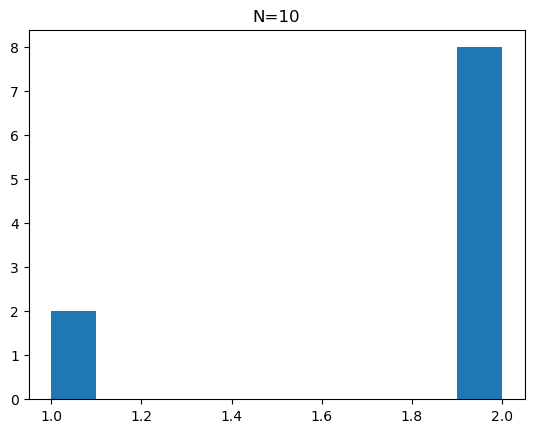

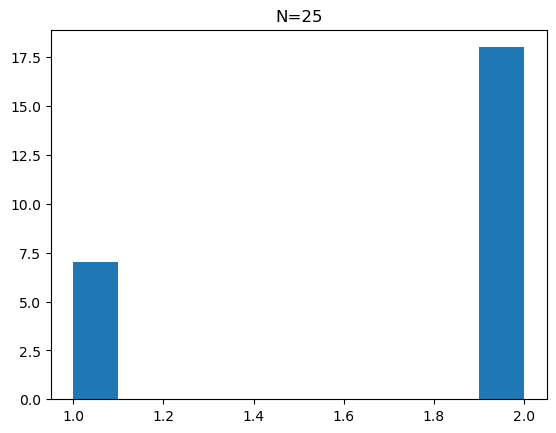

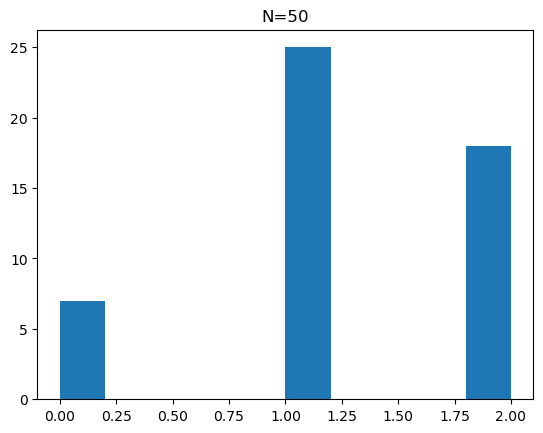

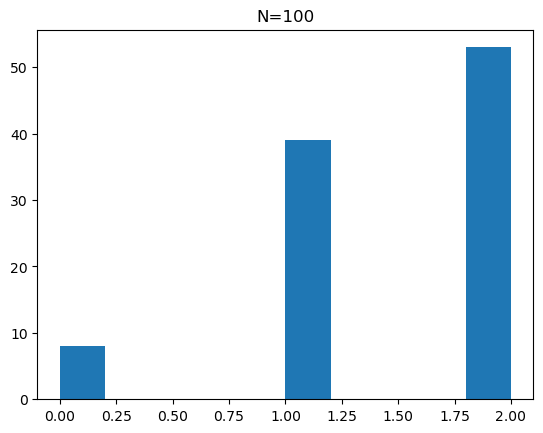

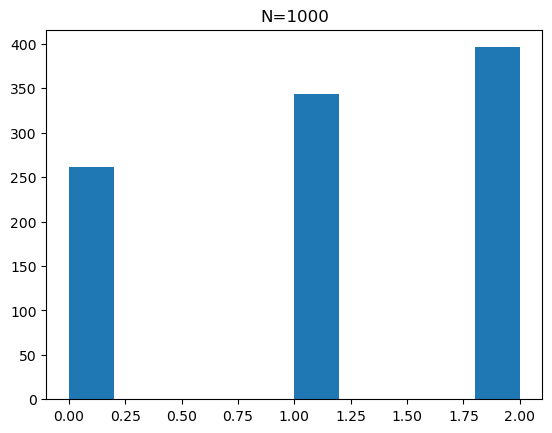

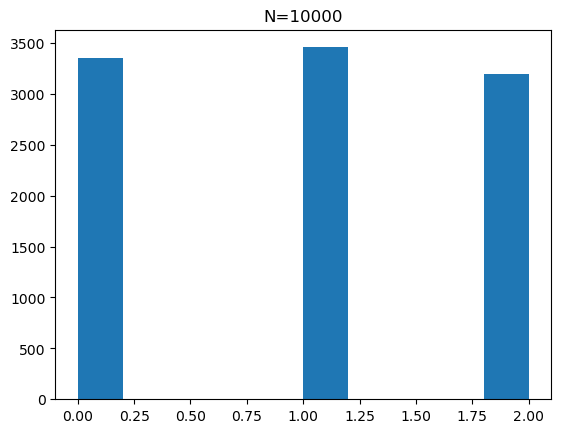

In [7]:
# Illustrate long-run state convergence
N = [10, 25, 50, 100, 1000, T]
states_sim = states_sim2
for n in N:
    plt.hist(states_sim[0:n])
    plt.title(f'N={n}')
    plt.show()

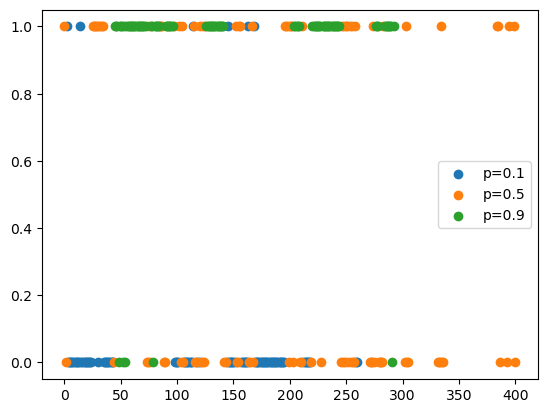

In [13]:
# Illustrate coin
x0 = (states_sim1 == 0)
x1 = (states_sim1 == 1)
x2 = (states_sim1 == 2)
plt.scatter(np.arange(T)[x0][0:100], flips_sim1[x0][0:100])
plt.scatter(np.arange(T)[x1][0:100], flips_sim1[x1][0:100])
plt.scatter(np.arange(T)[x2][0:100], flips_sim1[x2][0:100])
plt.legend([f'p={S[0]}', f'p={S[1]}', f'p={S[2]}'])
plt.show()

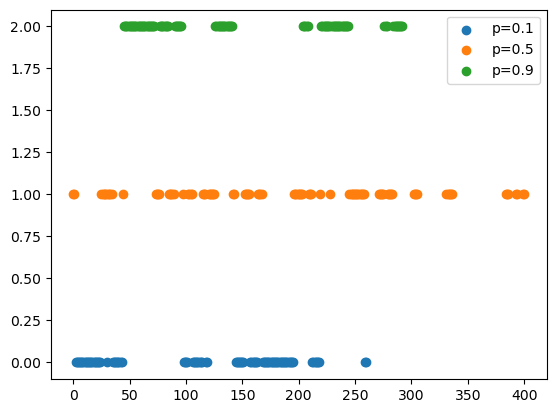

In [14]:
# Illustrate short-term state persistence
plt.scatter(np.arange(T)[x0][0:100], states_sim1[x0][0:100])
plt.scatter(np.arange(T)[x1][0:100], states_sim1[x1][0:100])
plt.scatter(np.arange(T)[x2][0:100], states_sim1[x2][0:100])
plt.legend([f'p={S[0]}', f'p={S[1]}', f'p={S[2]}'])
plt.show()

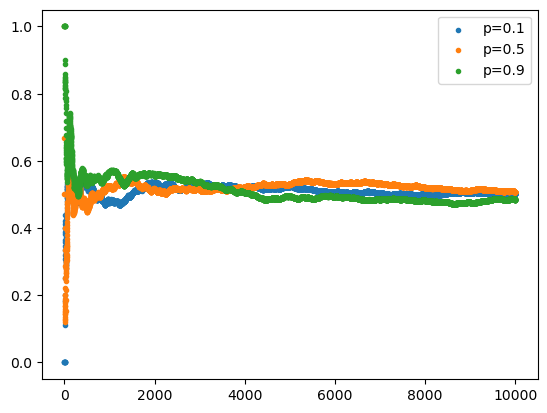

In [15]:
# Illustrate the coins long-term mean
y0 = np.cumsum(flips_sim0 == 1) / np.arange(1, T+1)
y1 = np.cumsum(flips_sim1 == 1) / np.arange(1, T+1)
y2 = np.cumsum(flips_sim2 == 1) / np.arange(1, T+1)
plt.scatter(np.arange(T), y0, marker='.')
plt.scatter(np.arange(T), y1, marker='.')
plt.scatter(np.arange(T), y2, marker='.')
plt.legend([f'p={S[0]}', f'p={S[1]}', f'p={S[2]}'])
plt.show()